In [1]:
# for correct relative imports
import sys; sys.path.append("../")

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from var_es_dgm.utils import seed_everything, compute_individual_returns, compute_portfolio_returns

In [3]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("paper")
seed_everything(777)

DATA_FOLDER = "../data/"
df = pd.read_csv(DATA_FOLDER + "complete_stocks.csv")
df["Date"] = pd.to_datetime(df["Date"])
tickers = ["AMZN"]
df = df.loc[df["Ticker"].isin(tickers)]

In [4]:
# transforming prices to returns
df_returns = compute_individual_returns(df)
df_returns = compute_portfolio_returns(df_returns)

  0%|          | 0/1 [00:00<?, ?it/s]

/var/folders/4k/lstdgcy15v147f38m110kgtm0000gn/T/ipykernel_10503/114064470.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


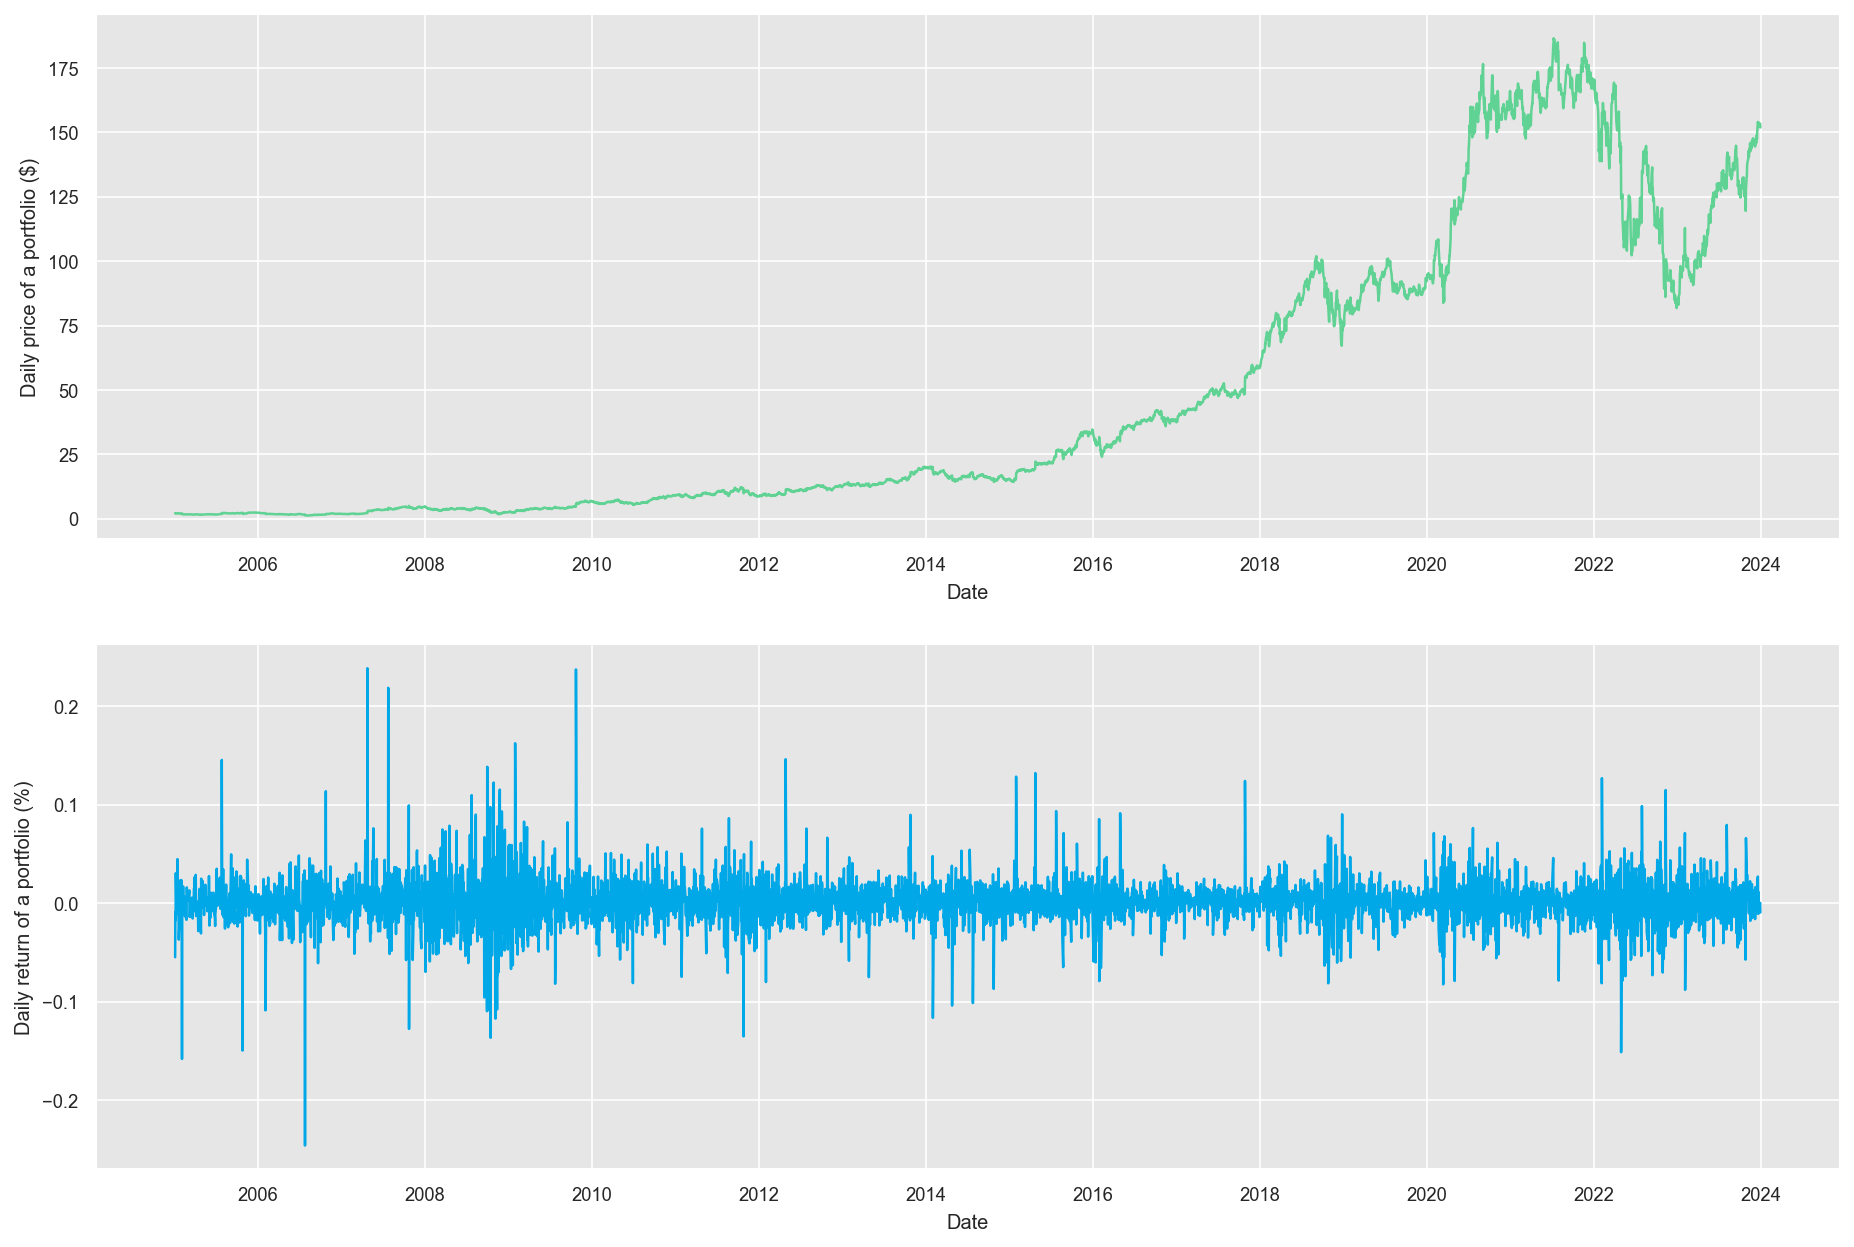

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15, 10), dpi=150)

# prices
sns.lineplot(df_returns, x="Date", y="Adj_Close_Target", color="#60D394", ax=ax[0])
ax[0].set_ylabel('Daily price of a portfolio ($)')

# returns
sns.lineplot(df_returns, x="Date", y="Return_Target", color='#00A8E8', ax=ax[1])
ax[1].set_ylabel('Daily return of a portfolio (%)')

fig.show()